# Predicting Heart Disease using Machine Learning Model

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

### The Data consists of several different health metrics that are mentioned below:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## We're going to use `pandas`, `Matplotlib` and `NumPy` for data analysis and manipulation.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay, confusion_matrix, classification_report

### Loading the data

In [2]:
data = pd.read_csv("008 heart-disease.csv")

## Data Exploration (exploratory data analysis or EDA)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Checking how many Target values are there in the data.

In [5]:
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Looking at the Graphical representaion of the `target` values in the data.

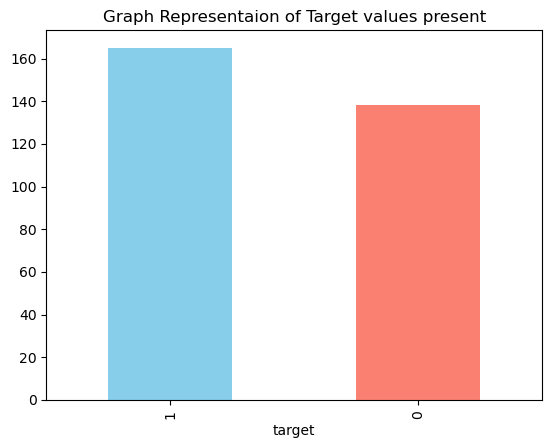

In [6]:
data["target"].value_counts().plot(kind="bar", color=["skyblue", "salmon"], title="Graph Representaion of Target values present");

In [7]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for any Missing values present in the data.

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Looking at more details of the Data.

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking at the number of Male & Female records present in the Data.

In [10]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

## Heart Disease according to `sex`.

In [11]:
pd.crosstab(data["sex"], data["target"])

target,0,1
sex,,
0,24,72
1,114,93


## Visual representation of the Heart Disease according to `sex`

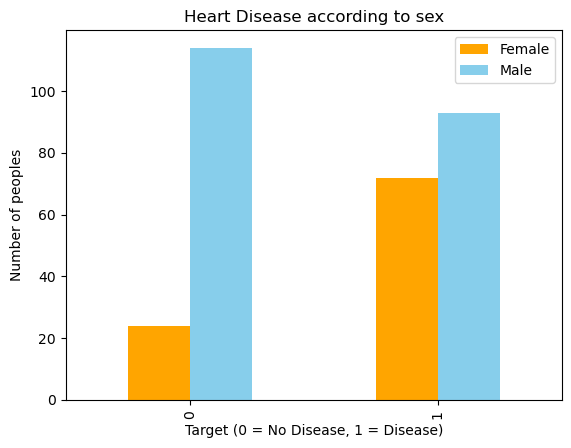

In [12]:
pd.crosstab(data.target, data.sex).plot(kind="bar", color=["orange", "skyblue"])
plt.title("Heart Disease according to sex")
plt.ylabel("Number of peoples")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.legend(["Female", "Male"]);

### Age Vs. Max Heart Rate for Heart Disease

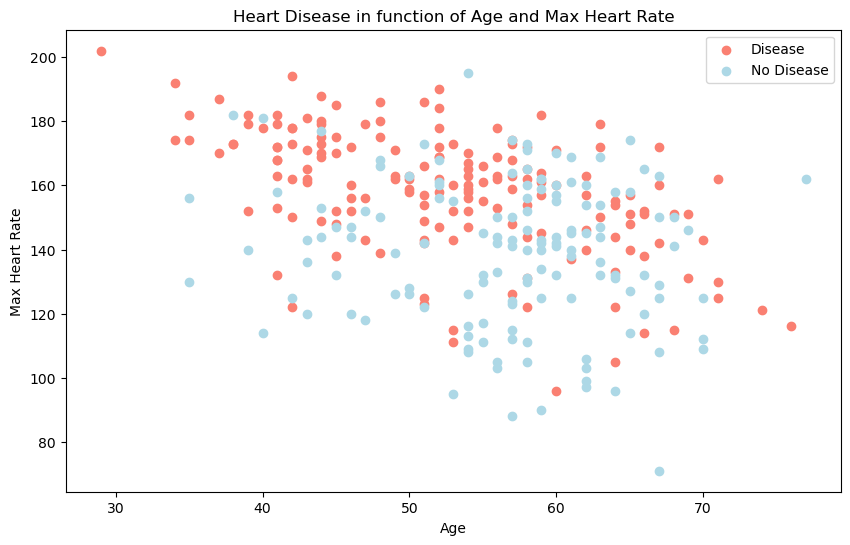

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data.age[data["target"] == 1], data.thalach[data["target"] == 1], color="salmon")

plt.scatter(data.age[data["target"] == 0], data.thalach[data["target"] == 0], color="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Graphical representaion of the distribution of the age.

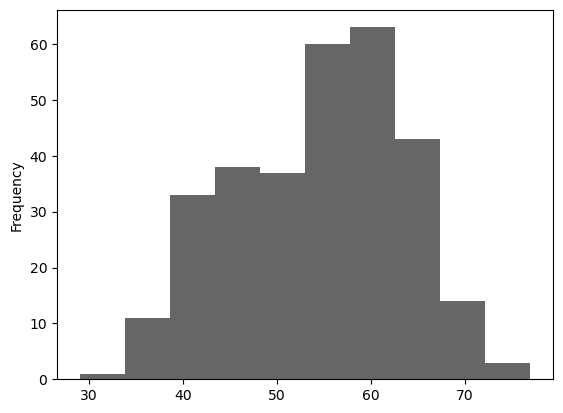

In [14]:
data["age"].plot.hist(color="#666");

### Heart Disease according to Chest pain type.

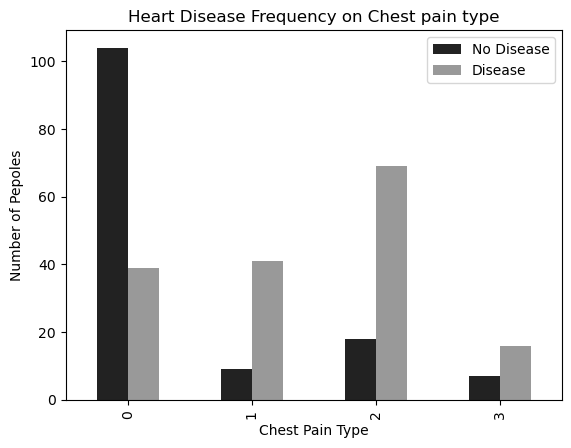

In [15]:
pd.crosstab(data["cp"], data["target"]).plot(kind="bar", color=["#222", "#999"])

plt.title("Heart Disease Frequency on Chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Pepoles")
plt.legend(["No Disease", "Disease"]);

## Checking the Correlation Matrix of the Data.

In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Visual Representation of the Correlation Matrix.

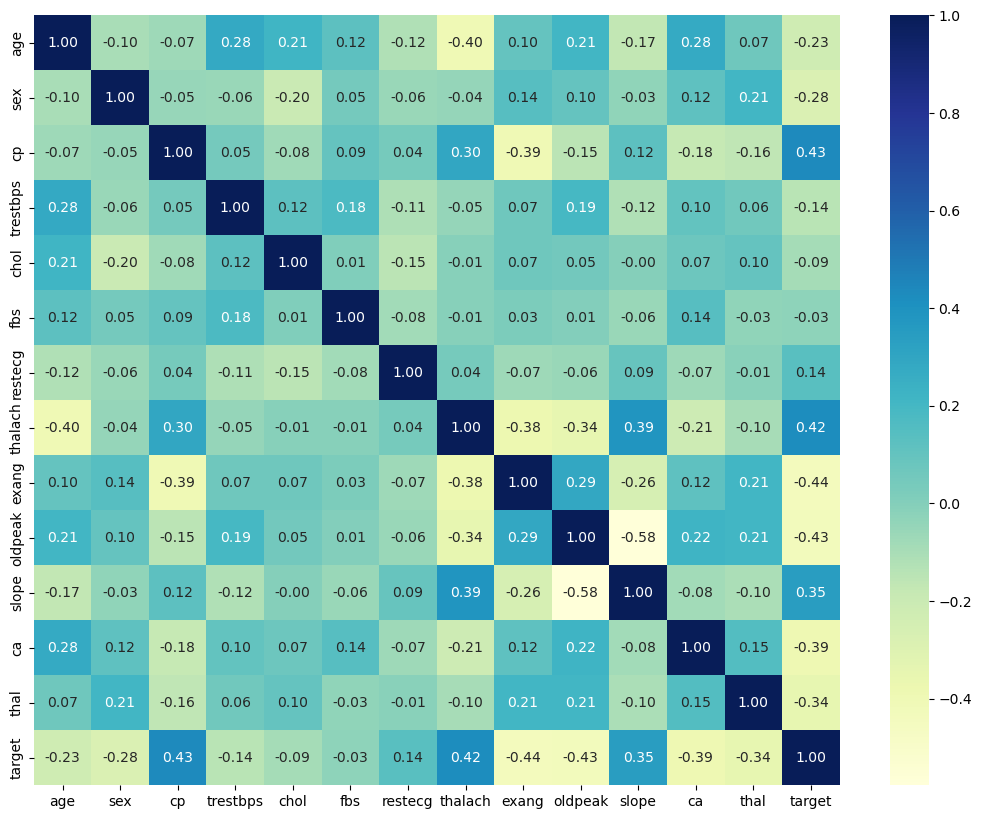

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13,10))

ax = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu");

## Splitting Data into `X` and `y`

In [18]:
X = data.drop("target", axis=1)
y = data["target"]

# Instantiating the Models that we're going to use:
* `LogisticRegression()`
* `KNeighborsClassifier()`
* `RandomForestClassifier()`

In [19]:
models = {
    "LR": LogisticRegression(),
    "KNC": KNeighborsClassifier(),
    "RFC": RandomForestClassifier()
}

## Creating a function to fit and score all the three models.

In [20]:
def models_and_scores(models, X, y):
    """
    Given Models as Dictionary returns the scores of the models trained on given data.
    """
    np.random.seed(9)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [21]:
scores = models_and_scores(models, X, y)
scores

C:\Users\kaushal cement ageny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8360655737704918,
 'KNC': 0.7049180327868853,
 'RFC': 0.8032786885245902}

## Comparing the Scores of all the Three Models.

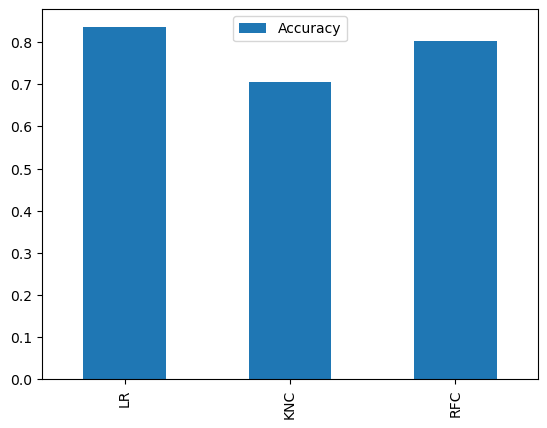

In [22]:
scores = pd.DataFrame(scores, index=["Accuracy"])
scores.T.plot.bar();

As the `KNeighboursClassifier()` performs the worst in the Baseline Predictions, we're not going to use it.

**We will Tune our other Two Models That performs well in our Baseline Predictions.** 

## Hyperparameters tuning with `RandomizedSerachCV()`
We're going to tune the models `LogisticRegression()` & `RandomForestCalssifier()` with different sets of Hyperparameters. 

In [23]:
LogReg_grid = { "C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

RanFor_grid = {"n_estimators": np.arange(10, 1000, 50),
               "max_depth": [None, 3, 5, 10],
               "min_samples_split": np.arange(2, 20, 2),
               "min_samples_leaf": np.arange(1, 20, 2)}

### Tuning `LogisticRegression()`

In [24]:
# np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LogRegModel = RandomizedSearchCV(LogisticRegression(), param_distributions=LogReg_grid, n_iter=20, verbose=True)

LogRegModel.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
LogRegModel.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
LogRegModel.score(X_test, y_test)

0.819672131147541

## Now Tuning the `RandomForestClassifier()`

In [27]:
RanForModel = RandomizedSearchCV(RandomForestClassifier(), param_distributions=RanFor_grid, n_iter=20, verbose=True)

RanForModel.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
RanForModel.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [29]:
RanForModel.score(X_test, y_test)

0.8360655737704918

## Hyperparameter tuning with `GridSerachCV()`

In [30]:
LogReg_grid_2 = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

LogRegModel_2 = GridSearchCV(LogisticRegression(), param_grid=LogReg_grid_2, cv=5, n_jobs=-1, verbose=True)

LogRegModel_2.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
LogRegModel_2.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [32]:
LogRegModel_2.score(X_test, y_test)

0.819672131147541

## Evaluating our tuned ML Classifier, with some predefined evaluation metrics

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [61]:
# Getting the Predictions of the best performing model: RandomForestClassifier()
y_predictions = LogRegModel_2.predict(X_test)

In [62]:
y_predictions

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### ROC curve metric evaluation:

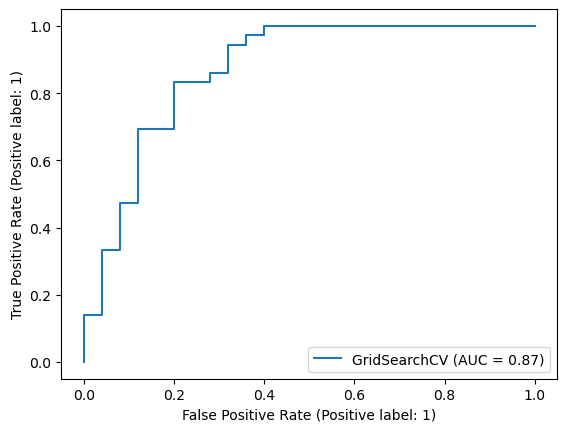

In [63]:
# Test Data ROC Curve
RocCurveDisplay.from_estimator(LogRegModel_2, X_test, y_test);

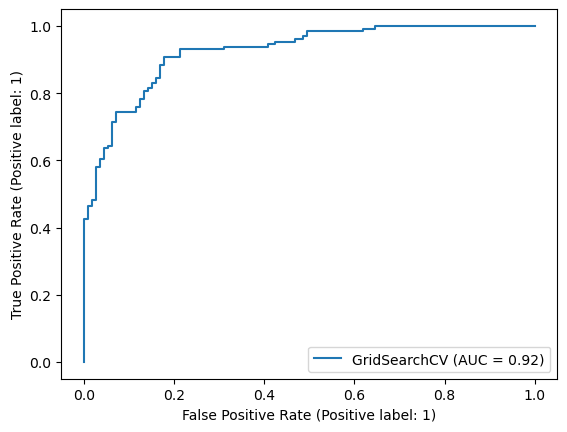

In [64]:
# Train data ROC Curve
RocCurveDisplay.from_estimator(LogRegModel_2, X_train, y_train);

## Confusion Matrix evaluation

In [65]:
conf_mx = confusion_matrix(y_test, y_predictions)
conf_mx

array([[15, 10],
       [ 1, 35]], dtype=int64)

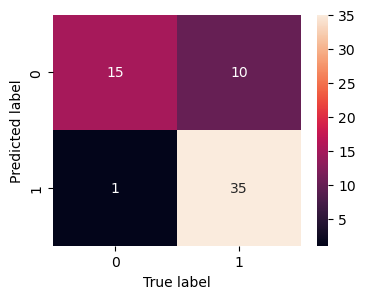

In [66]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(conf_mx, annot=True)
plt.xlabel("True label")
plt.ylabel("Predicted label");

## Classification Report of our Estimator

In [67]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.78      0.97      0.86        36

    accuracy                           0.82        61
   macro avg       0.86      0.79      0.80        61
weighted avg       0.84      0.82      0.81        61



## Calculating Evaluation Metrics using Cross Validation.

In [68]:
# Logistic Regression Model
LogRegModel_2.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [69]:
clf = LogisticRegression(C=0.1082636733874054, solver="liblinear")

In [73]:
clf_cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy", n_jobs=-1)
clf_cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision", n_jobs=-1)
clf_cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall", n_jobs=-1)
clf_cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1", n_jobs=-1)

In [74]:
clf_cv_acc.mean(), clf_cv_pre.mean(), clf_cv_rec.mean(), clf_cv_f1.mean()

(0.834808743169399, 0.8182683982683983, 0.9030303030303031, 0.8572876223964057)

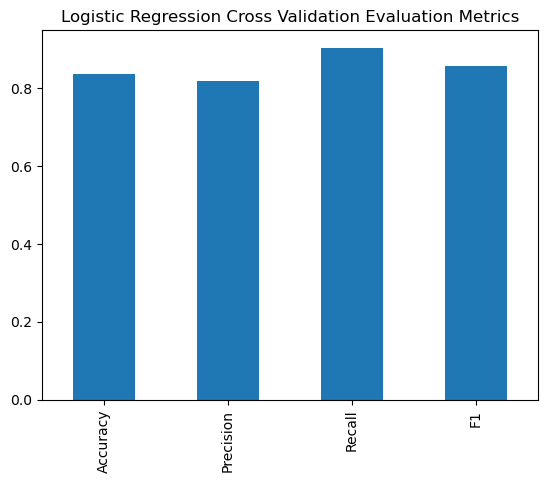

In [79]:
clf_metrics = pd.DataFrame({"Accuracy": clf_cv_acc.mean(), 
              "Precision": clf_cv_pre.mean(),
              "Recall": clf_cv_rec.mean(),
              "F1": clf_cv_f1.mean()}, index=[0])

clf_metrics.T.plot.bar(legend=False, title="Logistic Regression Cross Validation Evaluation Metrics");

## Checking Feature importance of our Data

In [82]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.01018688, -0.55616752,  0.58237693, -0.02011205, -0.00086639,
         0.01254265,  0.29833675,  0.0277869 , -0.43015541, -0.44577877,
         0.28396896, -0.65846119, -0.57684069]])

In [84]:
feature_dictionary = dict(zip(X.columns, clf.coef_[0]))
feature_dictionary

{'age': 0.010186879119614209,
 'sex': -0.5561675226891899,
 'cp': 0.5823769261997874,
 'trestbps': -0.020112049035568878,
 'chol': -0.0008663889485987197,
 'fbs': 0.012542653623789623,
 'restecg': 0.29833675378180063,
 'thalach': 0.027786903184809156,
 'exang': -0.43015540557594256,
 'oldpeak': -0.4457787701076293,
 'slope': 0.2839689586882101,
 'ca': -0.658461187857297,
 'thal': -0.5768406945686041}

## Graphical representation of Feature Importance

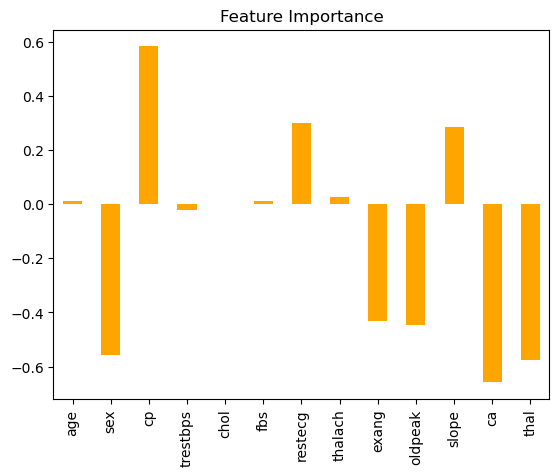

In [88]:
features_df = pd.DataFrame(feature_dictionary, index=[0])
features_df.T.plot.bar(legend=False, title="Feature Importance", color="orange");

# As per the Evaluation our model is capable of Predicting whether a person has Heart Disease or not with a accuracy of 85.53%  

In [97]:
accuracy = clf.score(X_train, y_train)
accuracy

0.8553719008264463

In [105]:
print(f"Accuracy Score is: {accuracy * 100}%")

Accuracy Score is: 85.53719008264463%
